# Scraping

교안 : https://lms.koipa.or.kr/static/uploads/lectures/Scraping.pdf

### Scraping : 내가 원하는 특정 정보만을 가지고 올 수 있다. 

+ 크롤링은 웹을 다뤄서 규모가 크지만, 스크래핑은 내가 원하는 곳에서 원하는 양만큼 어떤 규모든 얻어올 수 있음.

exercise :
https://validator.w3.org/unicorn/?ucn_lang=ko

In [1]:
import requests

headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537'}


def getDownload(url, param = None, retries = 3):
    resp = None
    try:
        resp = requests.get(url, params = param, headers = headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print('Retries : {0}'.format(retries))
            return getDownload(url, param, retries -1)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.request.headers)
            
    return resp

In [2]:
from bs4 import BeautifulSoup

# 국가명 가져오기
url = http://example.webscraping.com/places/default/index


In [19]:
# 일반적으로 id값을 찾는 것이 도움이 됨. 하나 뿐이라. 
# 국가명 가져오기

url = 'http://example.webscraping.com/places/default/index'
html = getDownload(url)
dom = BeautifulSoup(html.text,'lxml')

In [20]:
# ""# is id"
for tag in dom.select("#results a"):
    print(tag.text)

 Afghanistan
 Aland Islands
 Albania
 Algeria
 American Samoa
 Andorra
 Angola
 Anguilla
 Antarctica
 Antigua and Barbuda


In [21]:
# 결과는 똑같지만 Select 쓰는게 더 간편하고 짧음 !!
res = dom.find('',{'id':"results"})
for tag in res.find_all('a'):
    print(tag.text)

 Afghanistan
 Aland Islands
 Albania
 Algeria
 American Samoa
 Andorra
 Angola
 Anguilla
 Antarctica
 Antigua and Barbuda


# 국기 가져오기

In [27]:
for tag in dom.select('#results  a > img'):
    if tag.has_attr("src"):    # 있는지 확인해봐야함  
         print(requests.compat.urljoin(url,tag['src'])) 
            
            # 결과는 그 안에있는 상대주소임 
            # base url과 합쳐줘야한다.
            # requests.compat.urljoin() 사용해서 절대경로로 만들어준다. 
            # 눌렀을 때, 사진이 떠야 성공

http://example.webscraping.com/places/static/images/flags/af.png
http://example.webscraping.com/places/static/images/flags/ax.png
http://example.webscraping.com/places/static/images/flags/al.png
http://example.webscraping.com/places/static/images/flags/dz.png
http://example.webscraping.com/places/static/images/flags/as.png
http://example.webscraping.com/places/static/images/flags/ad.png
http://example.webscraping.com/places/static/images/flags/ao.png
http://example.webscraping.com/places/static/images/flags/ai.png
http://example.webscraping.com/places/static/images/flags/aq.png
http://example.webscraping.com/places/static/images/flags/ag.png


In [29]:
# 헤더로 검색해서 확장자가 png인지 확인하면 된다. 
html = getDownload('http://example.webscraping.com/places/static/images/flags/af.png')
html.headers['Content-Type']
# / 구분되어 있음. 

'image/png'

# Open

파일 객체 = open(파일 이름, 파일 열기 모드)

r = 읽기 모드

w = 쓰기 모드

a = 추가 모드

In [34]:
imgSrc = 'http://example.webscraping.com/places/static/images/flags/af.png'

# / 로 구분하여 확인하기 : 맨 마지막이 파일의 이름이 된다. 
imgSrc.split('/')

# 이중에 마지막 것이 필요함. ( 파일 이름 )

imgName = imgSrc.split('/')[-1]

with open(imgName,'wb') as f: # write binary
    f.write(html.content)
    
    # 폴더에 이미지가 다운로드 된다. 

In [1]:
# html.content # bytetype 그대로를 출력하고 저장해야함. 

# 따로따로 했던 것을 합치기

In [39]:
for tag in dom.select('#results  a > img'):
    if tag.has_attr("src"):    # 있는지 확인해봐야함  
        src = requests.compat.urljoin(url,tag['src'])
        
        html = getDownload(src)
        if html.headers['Content-Type'].split('/')[0] == 'image':
            with open(src.split('/')[-1], 'wb') as f:
                f.write(html.content)
                
                # 10개의 이미지 다운로드 되어야함. 

In [ ]:
# too many request 나오면 딜레이 걸기
import time
import random
time.sleep(random.randint(1,3)) # src 아래 줄에 삽입하기. 

# 뽐뿌 스크래핑 

url = http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu

In [147]:
url ='http://www.ppomppu.co.kr/zboard/zboard.php'
param = {'id':'ppomppu'}

html = getDownload(url,param)
# html.text로 잘 받아왔는지 확인하기 

In [57]:
# euc-kr 이라고 utf-8 로 바꿔줘야한다. 
html.encoding = 'utf-8'
# html.text 써서 확인 
# 그러면 한글이 다 깨지게 된다. 비트 수가 안 맞아서. 


In [64]:
encoding = html.headers["Content-Type"].split('=')[-1]

In [118]:
type(html.content)

bytes

In [68]:
 # html.content.decode(encoding,'ignore')
# 그냥하면 에러가 뜸  : 'ignore'로 error를 무시해야한다. 
# 이렇게 복잡한 과정이
# html.text 하나로 해결이 된다. 

In [148]:
# parser의 문제 
# lxml -> html.parser
dom = BeautifulSoup(html.text,'html.parser')

In [149]:
len(dom.find_all('',{'class':'list_title'}))

18

In [159]:
 # class = .  으로 표현 
for tag in dom.select('.list1'):
    tdList = tag.find_all('td',recursive=False)
    print(len(tdList))
    print(tdList[3].text.strip())  # 제목
    print("http:"+tdList[3].find('img')['src']) # 그림 
    
#     print(tdList[3].select_one(".list_title").text) # 제목
# 하나가 list_title 없어서 그냥 인덱싱으로 출력 
    
#     print(tdList[4].text.strip())  # 시간
    print(tdList[4]['title'])
    
#     print(tdList[5].text.strip())  # 추천수  뒤에건 비추 
    print(tdList[5].text.split('-')[0].strip())
    
#     print(tdList[6].text.strip())  # 조회수
    print(tdList[6].text.strip(), end="\n\n")
    

7
[시소닉 공식몰] 시소닉 프라임 울트라 티타늄 1000W + 슬리빙 케이블 (386,000/2,500)  1
http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/4/small_311474.jpg?t=20190312154413
19.03.12 15:47:19

1038

7
[위메프] [33데이] 닌텐도스위치 악세사리모음, 필름 커버 등등 (933원/무배)  16
http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/1/small_311471.jpg?t=20190312150600
19.03.12 15:09:53
3
2466

7
[위메프]프랑프랑 토끼주걱1+1 (11,333/무료)  20
http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/9/small_311469.jpg?t=20190312145739
19.03.12 15:01:31
1
2880

7
[네이버] KF94 3중필터 미세먼지 마스크(10원/2,500원  28
http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/7/small_311467.jpg?t=20190312143405
19.03.12 14:37:57
0
2968

7
[티몬] 서울우유 멸균우유 1000ml 10개 (16,835/무료배송) 카드추가할인  57
http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/4/small_311464.jpg?t=20190312140842
19.03.12 13:46:37
25
5456

7
[인터파크] 로지텍 g102 (21,900 / 무료)  41
http://cdn.ppomppu.co.kr/zboard/data/_thumb/ppomppu/2/small_311462.jpg?t=20190312125006
19.03.12 12:53:58

6452

7
[G마켓] LG 75인치 TV 75UK6190PUB (1,

# 뽐뿌 자유게시판

In [160]:
url = 'http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard'
html = getDownload(url)
dom = BeautifulSoup(html.text,'html.parser')

In [180]:
links =[]

for tag in dom.select('font.list_title'):
    print(tag.text)
    print(requests.compat.urljoin(url,tag.find_parent()['href']))
    links.append(requests.compat.urljoin(url,tag.find_parent()['href']))

앞으로 4대 불법 주정차시 주의하셔야 합니다.
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340134
?? 승리 군입대후 군 검찰한테 조사받을 가능성이 크다네요
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340133
현재 미세먼지 상황
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340132
'트와이스' 찌라시는, 완전 허위…소속사 "강력 대응하겠다"
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340131
日 천주교계 "남북분단 근원에 일본 침략 있어"
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340130
중국군 관련기사보니까 남수단에서 도주한거생각나네요ㅋㅋ
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340129
버닝썬이랑 경찰관들 관련 사건은 끝난건가요?
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340128
정준영 현재 위치
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340127
아이참 쑥스럽게 이런걸 또 알림창으로 알려 주네요.
http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340126
승리 BBC에 기사

In [181]:
links

['http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340134',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340133',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340132',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340131',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340130',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340129',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340128',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340127',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340126',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340125',
 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340124',
 'http://www.ppomppu.

In [199]:
for link in links:
    html = getDownload(link)
    dom = BeautifulSoup(html.text,'html.parser')
    for tag in dom.select_one('.board-contents'):
        print(tag.text)
    break

TypeError: 'NoneType' object is not iterable

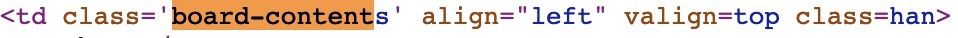

클래스가 두 개라 안됨 ( 변수를 덮어써버림 )

han으로 찾아봐도 안됨. 오류인 것! 

소스 코드를 보고 문제를 해결해야함. DOM만 보고서는 해결 못함 .

In [201]:
for link in links:
    html = getDownload(link)
    dom = BeautifulSoup(html.text,'html.parser')
    print(dom.select_one('table.pic_bg td.han').text)
    for tag in dom.select('td.han'):
        print(tag.text)
    break



앞으로 4대 불법 주정차시 주의하셔야 합니다. 39




이메일
북마크
밴 드
트위터


페이스북
카카오스토리




주소복사





이름: 당분간은지금처럼

현장 확인 없이 바로 과태료 부과되는 '주민신고제' 전국 확대 한다고 합니다.

 


4월 17일 부터 시행한다고 하네요.

 
벌금 4만 -> 8만 인상

4대 불법 주‧정차 유형은 
- 소방시설 주변 5m 이내 
- 교차로 모퉁이 5m 이내 
- 버스 정류소 10m 이내 
- 어린이 보호구역 등

소방시설의 경우 도로 연석을 적색으로 표시해 시인성을 높이고,
어린이 보호구역 내에는 절대 주‧정차 금지구간을 알리는 보조표지판도 설치


주민신고 활성화를 위해 안전보안관을 작년의 2배 수준인 1만5000명으로 확대 실시
안전신문고 앱으로  주‧정차 위반차량의 사진 2장을 1분 간격으로 촬영해 신고하면 해당 지자체에서 자동으로 과태료를 부과한다. 
* 단 신고로 인한 별도의 인센티브는 주어지지 않는다.

17년 제천 화재사고 이후 강화되어가는 것 같네요.

주차시 유의하셔야 합니다.  
 
 
https://news.v.daum.net/v/20190312120017131?rcmd=rn


In [203]:
for link in links:
    html = getDownload(link)
    dom = BeautifulSoup(html.text,'html.parser')
    print(dom.select_one('table.pic_bg td.han').text)
    # 위로 조상까지 올라가서 다시 타고 내려와야 내용이 나온다. 
    break


현장 확인 없이 바로 과태료 부과되는 '주민신고제' 전국 확대 한다고 합니다.

 


4월 17일 부터 시행한다고 하네요.

 
벌금 4만 -> 8만 인상

4대 불법 주‧정차 유형은 
- 소방시설 주변 5m 이내 
- 교차로 모퉁이 5m 이내 
- 버스 정류소 10m 이내 
- 어린이 보호구역 등

소방시설의 경우 도로 연석을 적색으로 표시해 시인성을 높이고,
어린이 보호구역 내에는 절대 주‧정차 금지구간을 알리는 보조표지판도 설치


주민신고 활성화를 위해 안전보안관을 작년의 2배 수준인 1만5000명으로 확대 실시
안전신문고 앱으로  주‧정차 위반차량의 사진 2장을 1분 간격으로 촬영해 신고하면 해당 지자체에서 자동으로 과태료를 부과한다. 
* 단 신고로 인한 별도의 인센티브는 주어지지 않는다.

17년 제천 화재사고 이후 강화되어가는 것 같네요.

주차시 유의하셔야 합니다.  
 
 
https://news.v.daum.net/v/20190312120017131?rcmd=rn


# 댓글 가져오기 

In [217]:
for tag in dom.select('#quote.comment_wrapper'):
    print(tag.text)

In [207]:
for tag in dom.select('#quote.comment_wrapper'):
    han = tag.find_all('han',recursive=False)
    print(len(han))

In [228]:
for tag in dom.select('#quote div.han.comment_div1'):
    print(tag.text)

In [239]:
reply = dom.select('#quote .info_bg .han')
if len(reply) >1:
    for tag in reply:
        print('reply:')
        print(tag.text.strip(), end='\n\n')

reply:
불법 주차를 안하면 됨

reply:
주정차 금지이면 정차 자체도 금지인데 뭔 1분 텀을두고 사진을...

reply:
교회앞 불법주차금지구역에서 신고하면 다 부과하려나

reply:
당연히 해야할건데 고작 8만이라니.

앞으로 도둑질 형량 오른다고 도둑질 조심하여야 됩니다. 이거랑 뭐가 달라요

reply:
골목주정차500만부터 시행했으면

reply:
왜 인센티브 안주는건데
인센티브주면 전국 불법주차 다 사라질텐데 말야

하여튼 세금 자기 혼자 먹을려고 발악을

reply:
택시 제발 좀..

reply:
횡단보도 불법주정차도 집어넣지

이것도 신고해도 야간이다 주말이다 뭐다 처리안되더라구요

reply:
집앞에 우회전 도로에 맨날 불법 주차 되어있는데 좀 없어지면 좋겠네요

reply:
소방서는 즉시 견인으로 해버려야되요

reply:
그러니깐요. 정차도 안되는데 왜 1분인지참...

reply:
사진한장으론 움직여서 지나가고 있는건지 정차해둔건지  모르니까요

reply:
사진 한장이면 정차한 차인지 움직이고 있는 차인지 구분이 안되서 그렇겠지요.

reply:
주행중이었다고 구라칠수도 있는지라 빼박해버리기 위해

reply:
분쟁소지 없애려는거겠죠
주행중임에도 교묘하게 찍어서 정차한것처럼 보인거라고 주장하면 골치아파지니까요

reply:
분쟁의 소지를 없게 하려는 의도라고 봐요.

reply:
주행중인지 아닌지를 판단하려면 5초정도만 해도 충분하리라봐요.
동네에 길모퉁이, 횡단보도 물고 주차된 차들 신고한다고 기존에 5분인가? 시간텀 있어야된데서 사진찍다가 시비 많이 붙었거든요.정차라면 5초~10초만 텀이되어도 증명이 된다봐요.

reply:
제가 사는곳은 횡단보도,인도는 잘 처리 해주더라구요

reply:
현실적으로 주차 인프라를 대규모로 확충하지 않는 이상...

reply:
양조절 안되면 업무마비되죠..
동일건을 한두명이 신고할것도 아니고..

reply:
저도 덤프가 아예 신호등 가리고 세워놔서 신고했더니 야간이라고 안받아 주더라고

In [247]:
for link in links:
    html = getDownload(link)
    dom = BeautifulSoup(html.text,'html.parser')
    print('내용 :')
    print(dom.select_one('table.pic_bg td.han').text.strip())
    
    reply = dom.select('#quote .info_bg .han')
    
    if len(reply) > 0:
        for tag in reply:
            print('reply:')
            print(tag.text.strip(), end='\n\n')
            print()

내용 :
현장 확인 없이 바로 과태료 부과되는 '주민신고제' 전국 확대 한다고 합니다.

 


4월 17일 부터 시행한다고 하네요.

 
벌금 4만 -> 8만 인상

4대 불법 주‧정차 유형은 
- 소방시설 주변 5m 이내 
- 교차로 모퉁이 5m 이내 
- 버스 정류소 10m 이내 
- 어린이 보호구역 등

소방시설의 경우 도로 연석을 적색으로 표시해 시인성을 높이고,
어린이 보호구역 내에는 절대 주‧정차 금지구간을 알리는 보조표지판도 설치


주민신고 활성화를 위해 안전보안관을 작년의 2배 수준인 1만5000명으로 확대 실시
안전신문고 앱으로  주‧정차 위반차량의 사진 2장을 1분 간격으로 촬영해 신고하면 해당 지자체에서 자동으로 과태료를 부과한다. 
* 단 신고로 인한 별도의 인센티브는 주어지지 않는다.

17년 제천 화재사고 이후 강화되어가는 것 같네요.

주차시 유의하셔야 합니다.  
 
 
https://news.v.daum.net/v/20190312120017131?rcmd=rn
reply:
불법 주차를 안하면 됨

reply:
주정차 금지이면 정차 자체도 금지인데 뭔 1분 텀을두고 사진을...

reply:
교회앞 불법주차금지구역에서 신고하면 다 부과하려나

reply:
당연히 해야할건데 고작 8만이라니.

앞으로 도둑질 형량 오른다고 도둑질 조심하여야 됩니다. 이거랑 뭐가 달라요

reply:
골목주정차500만부터 시행했으면

reply:
왜 인센티브 안주는건데
인센티브주면 전국 불법주차 다 사라질텐데 말야

하여튼 세금 자기 혼자 먹을려고 발악을

reply:
택시 제발 좀..

reply:
횡단보도 불법주정차도 집어넣지

이것도 신고해도 야간이다 주말이다 뭐다 처리안되더라구요

reply:
집앞에 우회전 도로에 맨날 불법 주차 되어있는데 좀 없어지면 좋겠네요

reply:
소방서는 즉시 견인으로 해버려야되요

reply:
그러니깐요. 정차도 안되는데 왜 1분인지참...

reply:
사진한장으론 움직여서 지나가고 있는건지 정차해둔건지  모

reply:
대부분 합의하면 집행유예 나올거예요

내용 :
파란색 식탁등위치를 빨간색위치로 옮기려고하는데
 
혼자 가능할까요?
reply:
네

reply:
벽뚫어서 시공해야하는데 불가능하죠

reply:
고정은 누가하고 누가 잡아줄려구요... 한 명은 더 있어야...

reply:
네

reply:
반분해가 되면 될거같은데 앵커 박은거 풀면서 받아내려면 힘들걸요. 
등걸린 사슬부분 빠지면 윗부분은 가벼우니 할만할겁니다.
근데 가능하면 두사람이서 해야죠. 의자라도 잡아줘야..

reply:
가능하죠 힘들어서 그렇지
전구 다 떼고 하면 되긴 됩니다

reply:
가능하긴한데 깔끔하게는 힘들듯 하네요

reply:
되긴 하는데 선을 뺄 생각을 잘 하셔야 되겠네요. 긴 철사 같은거라도 구하셔서 선을 옮기셔야..
차단기 잘 내리고 작업하시구요.

reply:
가능은하지만 기존조명 마감이며 일이 많아요

reply:
내선하면서 혼자서 다 하고 다녔습니다.

reply:
내선 하실정도면 이미 업으로 하시는 분이라 글쓴이에게는 해당이 안되겠죠 ㅎㅎ

reply:
장담컨데 저거 설치하면서 앙카박는 전기업자는 세상에 없을거라 확신합니다..

그냥 다루끼같은걸로 보강조금하고 설치하면 다행 ㅎ

reply:
슈마허 : 운전 개쉬움

내용 :
내가 국내 어지간한 정보지는 다 보는 사람인데요. 각종 정보지뿐아니라 연회비 1500만 짜리 유료 경제 미디어 까지 울며 겨자먹기로 가입되어 있는...
 
대기업 HR쪽이고, 홍보쪽도 같이 있어서  보기 싫어도 그냥 대충이라도 보게 되는데
 
정준영 연관 걸그룹 2명의 이름이 찌라시에 돈다 ? 그런 내용 없습니다. 
 
 
그럼 어제 오늘 갑자기 걸그룹 2명의 이름이 찌라시에 돈다는거는 뭘까요. ?  결국 이건 개인의 뇌피셜 소설이라는거죠
 
누군가 최초 유포자가 있을텐데, 소속사에서 발빠르게 대처 했으면 이미 수사 들어갔을꺼고...
 
수사가 지연되었다 하더라도, 목격자들 중에는 자료 따 놓고 신고 넣어놓은 사람도 있을테니 인실좆 맛 좀 보

내용 :
저한테도 왔네요
알리 글 예전에 하나 배송 드럽게 늦게 왔다라는 글 남긴적이 있는데 그거보고 쪽지보냈나봅니다
내용 :
Your browser does not support the video tag.                     

 
 
 
혼자 사고난건 다행인데
 
제발 안전운전 하는 습관을.. 
 
차가 휙 돌면서 뭔가 날아가는데 
 
차 범퍼다, 운전자다 갑론을박이네요..;;; 
 
 
구글링으로 블랙박스로 본 세상 검색 중인데 확실한건 모르겠구요..
reply:
그래도 튼튼하네요

reply:
범퍼같네요..

reply:
안전벨트안해서 운전자 창문밖으로 (도로 오른쪽)날아갔다고 본거같네요

reply:
사람은 아닌 것 같네요

reply:
사람 날아가는거 같은데요? 마지막에 운전석에 사람 없네요;

reply:
사람이 맞는거 같은데요.. 운전석 나올때 운전자가 안보여요 ㅠㅠ

reply:
사람이네요

reply:
운전을 못하면 제발 서행이라도...

reply:
어휴. 블박차 상했겠네

reply:
경차로 저 짓하면 죽고싶어 안달난 거

reply:
일단 사람 아니냐고 다들 물어보시는 건 사람은 아닙니다.

내용 :

reply:
요새 올검 이쁜게 많아서..뉴발트리플블랙이나

reply:
왠지 조던과 맥스의 혼종 같은 느낌...

reply:
비슷한모델 49$ 받았은데요 
정사이즈 .. 
진짜 편해요 
전 신발끈은 고무줄끈으로 교체했습니다

reply:
블랙은 더워보여요

reply:
휠라 어글리슈즈 비슷하네요. 퓨마껀데 휠라&나이키에어 콜라보 같네요.
쿠션 좋아보이는데 코디하기가 쉽지 않을듯합니다.

reply:
옛날 정형돈이 신을법하게 생겼어요 ㅋㅋ

reply:
뚱줄이 이쁜데 왜 줄을 바꾸셨어요?



In [248]:
dom.select('#quote.comment_wrapper')

[]

In [261]:
url = 'http://www.ppomppu.co.kr/zboard/view.php?id=freeboard&page=1&divpage=1184&no=6340134'
html = getDownload(url)
dom = BeautifulSoup(html.text,'html.parser')

for tag in dom.select('#quote .info_bg .han'):
    print('댓글 : ')
    
    print(tag.text.strip())
    print('대댓 :')
#     for reply in dom.select('#quote')

댓글 : 
불법 주차를 안하면 됨
대댓 :
댓글 : 
주정차 금지이면 정차 자체도 금지인데 뭔 1분 텀을두고 사진을...
대댓 :
댓글 : 
교회앞 불법주차금지구역에서 신고하면 다 부과하려나
대댓 :
댓글 : 
당연히 해야할건데 고작 8만이라니.

앞으로 도둑질 형량 오른다고 도둑질 조심하여야 됩니다. 이거랑 뭐가 달라요
대댓 :
댓글 : 
골목주정차500만부터 시행했으면
대댓 :
댓글 : 
왜 인센티브 안주는건데
인센티브주면 전국 불법주차 다 사라질텐데 말야

하여튼 세금 자기 혼자 먹을려고 발악을
대댓 :
댓글 : 
택시 제발 좀..
대댓 :
댓글 : 
횡단보도 불법주정차도 집어넣지

이것도 신고해도 야간이다 주말이다 뭐다 처리안되더라구요
대댓 :
댓글 : 
집앞에 우회전 도로에 맨날 불법 주차 되어있는데 좀 없어지면 좋겠네요
대댓 :
댓글 : 
소방서는 즉시 견인으로 해버려야되요
대댓 :
댓글 : 
그러니깐요. 정차도 안되는데 왜 1분인지참...
대댓 :
댓글 : 
사진한장으론 움직여서 지나가고 있는건지 정차해둔건지  모르니까요
대댓 :
댓글 : 
사진 한장이면 정차한 차인지 움직이고 있는 차인지 구분이 안되서 그렇겠지요.
대댓 :
댓글 : 
주행중이었다고 구라칠수도 있는지라 빼박해버리기 위해
대댓 :
댓글 : 
분쟁소지 없애려는거겠죠
주행중임에도 교묘하게 찍어서 정차한것처럼 보인거라고 주장하면 골치아파지니까요
대댓 :
댓글 : 
분쟁의 소지를 없게 하려는 의도라고 봐요.
대댓 :
댓글 : 
주행중인지 아닌지를 판단하려면 5초정도만 해도 충분하리라봐요.
동네에 길모퉁이, 횡단보도 물고 주차된 차들 신고한다고 기존에 5분인가? 시간텀 있어야된데서 사진찍다가 시비 많이 붙었거든요.정차라면 5초~10초만 텀이되어도 증명이 된다봐요.
대댓 :
댓글 : 
제가 사는곳은 횡단보도,인도는 잘 처리 해주더라구요
대댓 :
댓글 : 
현실적으로 주차 인프라를 대규모로 확충하지 않는 이상...
대댓 :
댓글 : 
양조절 안되면 업무마비되죠..
동일건을 한두명이 신고할것도 아